In [1]:
!pip install seaborn --upgrade

    100% |████████████████████████████████| 215kB 28.3MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1
  [seaborn]
You must restart the runtime in order to use newly installed versions.


# Lecture 4: Simpson's rule

Last time we made a function that could integrate functions using the trapezoidal rule. This time, let's start by doing the same thing using Simpson's rule.

In [0]:
# Define the function
def integrate_simpson(f, a, b, n_points):
  """ Simpson's rule integration. """

  # Set out the list of points
    
  dx = (b - a) / float(n_points)
    
  # Remember: the number of points needs to be even! How can we ensure this?

  if n_points%2!=0:
    n_points = n_points + 1
    dx = (b - a) / float(n_points)
    print('Uneven number of steps')

  # Perform the sum

  total = 0

  for i in range(1, n_points, 2):
    total += dx * (f(a + dx*(i-1)) + 4*f(a+ dx*i) + f(a+dx*(i+1)) ) / 3

  # Return the result

  return total

In [8]:
def func(x):
  return 3*x**2

integrate_simpson(func, 0, 1, 10)

1.0000000000000002

We'll compare our results with an integrator that uses the trapezoidal rule. I've already written the code below. Here I'm using `numpy` functions for convenience (and speed). We can investigate what unfamiliar functions do using the builtin `help()` function.

In [0]:
import numpy as np

def integrate_trapezoidal(f, a, b, n_points=100):
    """ 
    Perform integration using the trapezoidal rule and return the result.
    
    Parameters
    ----------
    f : univariate function
        The function to be integrated. Input should be one real-valued number.
    a : number
        The lower limit of integration.
    b : number
        The upper limit of integration.
    n_points : number, optional
        The number of subdivisions of the integration space to use. The default
        number of subdivisions is 100.
        
    Returns
    -------
    total : number
        The estimated integral.
    """
    
    dx = (b - a) / float(n_points)  # this is the spacing between points
    
    sample_points = np.arange(a, b, dx)  # set out the sample points evenly
    
    total = np.sum(f(sample_points) + f(sample_points + dx)) * dx / 2  # perform the sum
    
    return total  # and return it!

In [11]:
help(integrate_trapezoidal)

Help on function integrate_trapezoidal in module __main__:

integrate_trapezoidal(f, a, b, n_points=100)
    Perform integration using the trapezoidal rule and return the result.
    
    Parameters
    ----------
    f : univariate function
        The function to be integrated. Input should be one real-valued number.
    a : number
        The lower limit of integration.
    b : number
        The upper limit of integration.
    n_points : number, optional
        The number of subdivisions of the integration space to use. The default
        number of subdivisions is 100.
        
    Returns
    -------
    total : number
        The estimated integral.



Let's test these integrators on our function from yesterday, 

$$ f(x) = e^{-x^2}\,. $$

Integrating this from zero to one gives approximately 0.746824.

In [0]:
def func(x):
    return np.exp(-x**2)

In [13]:
print(integrate_trapezoidal(func, 0, 1))
print(integrate_simpson(func, 0, 1, 100))

0.74681800146797
0.746824132894176


**Aside:** these functions are starting to have a lot of arguments, do we really need to remember the exact order? *No*, as long as we know the name of the variable we're assigning. See the example below.

In [14]:
print(integrate_trapezoidal(func,   0,   1))
print(integrate_trapezoidal(func, b=1, a=0))

0.74681800146797
0.74681800146797


This time, let's plot the function we want to integrate and compare it with the approximation used in the numerical integral. This will give us a sense of the error on the integral. Let's use a function for this that changes significantly, like 

$$f(x) = \cos(x^2)\,.$$ 

If you integrate this function from zero to $2\pi$, it turns out that the answer is around 0.704682.

We'll plot this with the `lineplot` function from `seaborn`.

In [0]:
def f(x):
    return np.cos(x**2)

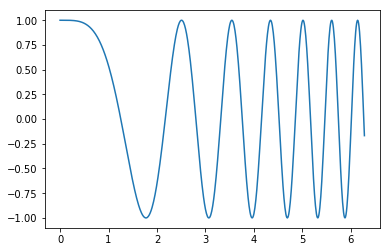

In [17]:
import seaborn as sns

# lineplot requires an array of x and y indices to make the plot

x = np.arange(0, 2*np.pi, 0.01)# fill this in
y = f(x) # fill this in

sns.lineplot(x, y) # plot the function

With n_points = 50, the trapezoidal approximation gives 0.687782


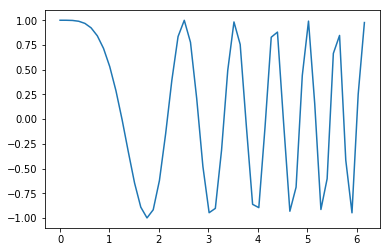

In [26]:
# what does the trapezoidal approximation look like?

a = 0
b = 2 * np.pi
n_points = 50

x_trapezoidal = np.arange(0, 2*np.pi, 2*np.pi/n_points)# fill this in
y_trapezoidal = f(x_trapezoidal) # fill this in

sns.lineplot(x_trapezoidal, y_trapezoidal) # plot the trapezoidal approximation

# what does the trapezoidal integral give in this case?

print('With n_points = %d, the trapezoidal approximation gives %lf' % 
      (n_points, integrate_trapezoidal(f, a, b, n_points)))

Plotting for Simpson's rule is a little bit more complicated because we need to estimate the quadratic function on each set of intervals, so to save time I've coded this out already.

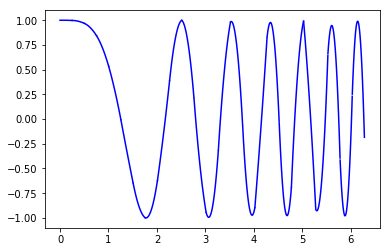

In [27]:
def simpson_a(f, x, dx):
    return (f(x-dx) - (2*f(x)) + f(x+dx)) / (2 * dx**2)

def simpson_b(f, x, dx):
    return (f(x+dx) - f(x-dx)) / (2 * dx)

def simpson_c(f, x, dx):
    return f(x)


a = 0
b = 2 * np.pi
n_points = 50

dx = (b - a) / float(n_points)
x  = np.arange(a, b, dx)

for i in range(1, len(x), 2): # run over all _odd_ integers!
    A = simpson_a(f, x[i], dx)
    B = simpson_b(f, x[i], dx)
    C = simpson_c(f, x[i], dx)
    
    xx = np.arange(x[i]-dx, x[i]+dx, 0.01)
    yy = (A * ((xx-x[i])**2)) + (B * (xx-x[i])) + C  # remember, expansion _around x[i]_!
    
    sns.lineplot(xx, yy, color='b')

In [28]:
# what does the integral with Simpson's rule give in this case?

print("With n_points = %d, Simpson's rule gives %lf" % (n_points, integrate_simpson(f, a, b, n_points)))

With n_points = 50, Simpson's rule gives 0.708500


Now, we can try checking the timing. How does the running time depend on the number of steps?

In [0]:
import time as ti
start_time = ti.time()

# integrate the function

# print the run time and the error